# iFood CRM Data Analyst Case
Rafael Faria Castelão

---
# Part 1: Predictive Model

The new campaign, sixth, aims at selling a new gadget to the Customer Database. To build the model, a pilot campaign involving 2.240 customers was carried out. The customers were selected at random and contacted by phone regarding the acquisition of the gadget. During the following months, customers who bought the offer were properly labeled.

The objective of this notebook is to build a model that predicts customer behaviour that can be applied to the rest of the customer base to identify which customers are willing to buy the new gadget after being target by the campaign.

## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
# Import data
pilot_data = pd.read_csv('ml_project1_data.csv', index_col=0)

# Print information for dataset
print("Dataset contains: \n• {} training examples (rows)\n• {} features (columns)."
      .format(pilot_data.shape[0], pilot_data.shape[1]))

Dataset contains: 
• 2240 training examples (rows)
• 28 features (columns).


In [3]:
# Since data has 28 features let's set an option to display all features
pd.set_option('display.max_columns', 50)

Let's explore the data a little bit:

In [4]:
# Print a sample of the data
pilot_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


It's possible to see that the dataset has a mix of quantitative and categorial data.

In [5]:
# Print a summary of the data
pilot_data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


The first thing that I see here is that there is only one column with some missing values: **Income**. It has 24 values missing, so we will have to deal with this later.

Another funny aspect is that there are two features that I do not see in the meta-data table in the case file: **Z_CostContact** and **Z_Revenue**. Checking the means and standard deviation for these two features, it's possible to see that they have the same value for all the training examples. We can conclude these features will not be useful to the model, so we can drop them.

In [6]:
# Drop the columns Z_CostContact and Z_Revenue
pilot_data.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

Like said before there are some categorical features in the dataset that need to be treated for the model to have a good fit.

In [7]:
# Checking for categorical data
print("Categorical features:\n{}".format(list(pilot_data.dtypes[(pilot_data.dtypes == 'object')].index)))

Categorical features:
['Education', 'Marital_Status', 'Dt_Customer']


Two of the features listed above are actually nominal features: **Education** and **Marital_Status**.

However, **Dt_Customer** the <ins>date</ins> of the customer's enrollment with the company. It is possible to redefine this feature to a continuous variable that represents the number of days this customer's enrolled with the company.

In [8]:
# Redefine Dt_Customer to represent the number of days the customer's enrolled with the company up to now
pilot_data['Dt_Customer'] = pilot_data['Dt_Customer'].map(lambda x: (datetime.now() - datetime.strptime(x, '%Y-%m-%d')).days)

In [9]:
pilot_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2875,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,1,1,2325,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,0,0,2524,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,1,0,2351,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,1,0,2373,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


Back to the other two categorical variables, **Education** and **Marital_Status** they have the following values:

In [10]:
print("Education: {} \nMarital Status: {}"
      .format(list(pilot_data['Education'].unique()), list(pilot_data['Marital_Status'].unique())))

Education: ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'] 
Marital Status: ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']


Both of these features are <ins>nominal variables</ins>, which means they do not have an intrinsic ranking. Since both of them have a small number of values, the approach we'll use for the model to deal with these features is the <ins>One-Hot Encoding</ins>.

P.S. I loved 'YOLO' marital status.

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
# Apply One-Hot Encoding to each nominal feature
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(pilot_data[['Education', 'Marital_Status']]))

# Put the index in Hot-One Encoding
OH_cols.index = pilot_data.index

# Create a dictionary to rename the columns in a more friendly way, instead of numbers from 0 to 12
OH_columns_rename_dict = {k: v for (k,v) in 
                          zip(list(OH_cols.columns), 
                              list(OH_encoder.get_feature_names(['Education', 'Marital_Status'])))}

# Rename the columns for the One-Hot Encoding
OH_cols.rename(columns=OH_columns_rename_dict, inplace=True)

Just to have a glance on what Hot-Encoding does, these are the rewritten **Education** and **Marital_Status** features.

In [13]:
OH_cols.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
ID,,,,,,,,,,,,,
5524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2174,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4141,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5324,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
# Remove the nominal variables Education and Marital_Status
pilot_data.drop(['Education', 'Marital_Status'], axis=1, inplace=True, errors='ignore')

# Add One-Hot encoded columns to numerical features
pilot_data = pd.concat([pilot_data, OH_cols], axis=1)

This is how the dataset is up to now.

In [15]:
pilot_data.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,58138.0,0,0,2875,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2174,1954,46344.0,1,1,2325,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4141,1965,71613.0,0,0,2524,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6182,1984,26646.0,1,0,2351,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5324,1981,58293.0,1,0,2373,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


The last step to have a good dataset to fit the model is to deal with the missing values. Like we've seen before, the only column that presents missing values is the **Income** one.

Since this feature seems an important one, usually the household's income is used as a base for several predictions, it will not be a smart move to drop this whole column. Besides that, there are only 24 out of 2240 missing values.

A better approach is to use the imputation method, which fills in the missing values with some number. In this case, we will fill in the mean value along this column. 

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
# Apply Simple Imputer to each column
my_imputer = SimpleImputer()
imputed_pilot_data = pd.DataFrame(my_imputer.fit_transform(pilot_data))

# Put the index and columns in imputed data
imputed_pilot_data.index = pilot_data.index
imputed_pilot_data.columns = pilot_data.columns

# Let's use the pilot_data variable again
pilot_data = imputed_pilot_data.copy()

After all these steps, we finally have a good dataset to work with, in which the model will be able to fit well.

The final dataset looks like the following.

In [18]:
pilot_data.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957.0,58138.0,0.0,0.0,2875.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2174,1954.0,46344.0,1.0,1.0,2325.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4141,1965.0,71613.0,0.0,0.0,2524.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6182,1984.0,26646.0,1.0,0.0,2351.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5324,1981.0,58293.0,1.0,0.0,2373.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Fitting Model

The first step to build a model is breaking the dataset into input and output variables. As the meta-data table in the case file states, **Response** variable is the target, that is what we want to predict. Since I believe all the other variables are important, or even slightly useful features, I'll define all other features as the input variables.

In [19]:
# Create the target vector
y = pilot_data['Response']

# Create a list of the input variables
pilot_features = list(set(pilot_data.columns) - set(['Response']))

# Create the input matrix
X = pilot_data[pilot_features]

The next step would be to split data into training and validation sets, where the <ins>training data</ins> is the one used to fit the model, while the <ins>validation data</ins> is used to calculate the model quality.

However, since our dataset is small, there are some drawbacks to this approach. Imagine we keep 80% of the dataset in the training data and 20% on the validation data. This leaves some random chance in determining model scores, depending on the split of the data.

I am using a different technique called <ins>cross-validation</ins>. It runs the modelling process on different subsets of the data to get multiple measures of model quality, therefore a more accurate measure.

The next step is to understand which model we are using to fit the data.

Since this a supervised learning we are dealing with two types of algorithms: regression or classification. The ideia is to create a hypothesis function that will predict the value of y. Since y is a discrete output, we are using a classification algorithm.

In [20]:
print("Response (target) values:\n{}".format(list(y.unique())))

Response (target) values:
[1.0, 0.0]


P.S. As we can see above, the output value is a discrete variable with values of 1 or 0. It configures a binary classification problem.

### Decision Tree

The first algorithm I am using is the <ins>Decision Tree</ins>, bacause it is a simple algorithm to start. It produces a sequence of rules that are used to classify the data.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [22]:
# Define model
dtree_model = DecisionTreeClassifier(random_state=0)

# Fit data and evaluate a score by cross-validation
scores = cross_val_score(dtree_model, X, y, cv=5, scoring='accuracy')

Function *cross_val_score* already fits the data, predicts the output based on the input features and evaluates the score. Since this is a classification problem, I am using the scoring method called <ins>accuracy score</ins>. It is basically the comparison matrix, which is the ratio of correctly predicted observations to the total observations.

We could also use <ins>MAE (Mean Absolute Error)</ins> to calculate the proportion of predictions that are wrong compared to y, since the output can only be 0 or 1.

P.S. Accuracy Score = 1 - MAE 

In [23]:
print("Decision Tree Accuracy: {:.3f} ".format(scores.mean()))

Decision Tree Accuracy: 0.844 


However, one of the parameters that we see on the model above is set as *max_leaf_nodes=None*. It permits our decision tree to have as many leaves as possibles, what can lead to an overfitting scenario, which is the case when the model fits que training data very well, but does not generalize well to predict the validation data.

A simple way to see if our model is overfitting and choose better hyperparameters is to check MAE for the validation data with different *max_leaf_nodel* values.

In [24]:
def get_mae_dtree(max_leaf_nodes, X, y):
    # Evaluate MAE for a Decision Tree Classifier model with different max_leaf_nodes values
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    # Calculate MAE by the formula MAE = 1 - Accuracy Score
    mae = 1 - scores.mean()
    
    return(mae)

In [25]:
# Iterate through different max_leaf_nodes values and calculate MAE
max_leaf_nodes_list = np.arange(5,120,5)
mae_list = []

for max_leaf_nodes in max_leaf_nodes_list:
    # Evaluate MAE
    mae = get_mae_dtree(max_leaf_nodes, X, y)
    
    # Append to the lists
    mae_list.append(mae)

Let's create a graph to visualize what is happening.

In [26]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'MAE values on Tree Depth')

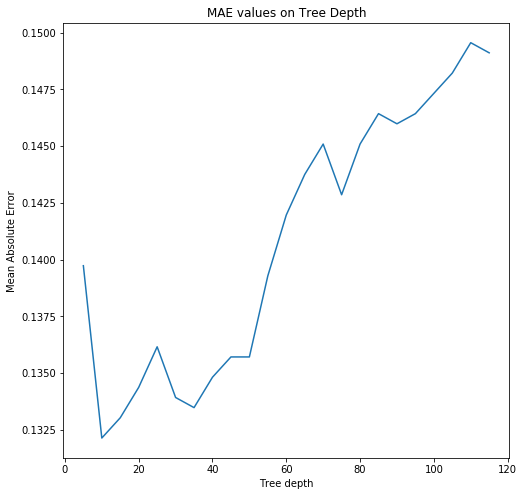

In [27]:
# Plot graph
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(max_leaf_nodes_list, mae_list)
ax.set_xlabel('Tree depth')
ax.set_ylabel('Mean Absolute Error')
ax.set_title("MAE values on Tree Depth")

If we split data into training and validation sets, we could see that MAE for training data is always decreasing along the tree depth axis. That happens because the model will fit better and better the training data with a bigger number of leaves in the decision tree. However, for the validation data, after a certain value for max_leaf_nodes, MAE starts to increase again. That happens because the model fits well the training data but does not generalize well for other inputs. 

In the case above, since we are using cross-validation to evaluate the model, we only have an average of MAE for different validation sets. The best value for the hyperparameter *max_leaf_node* is then 10, since it gets the lowest MAE value.

In [28]:
print("For max_leaf_node=10,\nDecision Tree Accuracy: {:.3f} \nDecision Tree MAE: {:.3f}"
      .format(1 - mae_list[list(max_leaf_nodes_list).index(10)], 
              mae_list[list(max_leaf_nodes_list).index(10)]))

For max_leaf_node=10,
Decision Tree Accuracy: 0.868 
Decision Tree MAE: 0.132


### Random Forest

Random forests use many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters.

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Define model
rf_model = RandomForestClassifier(random_state=0)

# Fit data and evaluate a score by cross-validation
scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

In [31]:
print("Random Forest Accuracy: {:.3f} ".format(scores.mean()))

Random Forest Accuracy: 0.877 


As we can see, even without setting the hyperparameters, random forest model got a better accuracy (87.7% accuracy) than the optimized decision tree algorithm.

### Logistic Regression
Despite the name of this algorithm being logistic <ins>regression</ins> it is a classification algorithm. The idea of this algorithm is to fit a hypothesis function that gives the probability that our output is 1 (since we are dealing with a binary classification problem instead of a multiclass classification one). This hypothesis is modelled using a logistic function (sigmoid function).

There are some hyperparameters I'm setting for this model to perform better. The first one, is the *solver*, which is the algorithm used in the optimization problem (minimizing the cost function tuning the parameteres of the hypothesis function). Since we are dealing with a binary classification problem and a small dataset, 'liblinear' will be the choice here.

To help the optimization algorithm to converge faster, one technique that will be used is the standardization of the dataset. It transforms the data to present a Gaussian distribution with zero mean and unit variance.

Another hyperparameter that will be set differently than default is *max_iter*, which is the number of iterations taken for the solver to converge. Usually, when you fit a model, it warns when the solver did not converge. Raising the value of this parameter allows the solver to iterate more in an attempt to converge.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [33]:
# Standardization algorithm
scaler = preprocessing.StandardScaler().fit(X)

# Apply standardization to X
train_X_scaled = scaler.transform(X)

In [34]:
# Define model
lr_model = LogisticRegression(random_state=0, max_iter = 1000, C=1, solver='liblinear', penalty='l2')

# Fit data and evaluate a score by cross-validation
scores = cross_val_score(lr_model, train_X_scaled, y, cv=5, scoring='accuracy')

In [35]:
print("Logistic Regression Accuracy: {:.3f} ".format(scores.mean()))

Logistic Regression Accuracy: 0.885 


As we can see, logistic regression got an even better accuracy than random forest, after setting the hyperparameters. The obtained accuracy is 88.5%.